特征值为： [3.70994432 1.26043741 0.43647343 0.14696887 0.17032986 0.27584611] 
累加和为： [3.70994432 4.97038173 5.40685516 5.55382403 5.72415389 6.        ]
载荷矩阵为：
 [[ 0.91876033  0.8567525   0.8829638  -0.48309401 -0.66879581 -0.60066615]
 [-0.09797002 -0.23995622 -0.25832217 -0.65821524 -0.55969167 -0.4322634 ]]
特殊方差为：
 [0.14628575 0.20754986 0.15476796 0.33342621 0.24140201 0.45132111]
排序结果为：
           f1        f2        yf     tf    xh
43  2.508384 -0.173643  1.828250  458.0  44.0
22  2.349977 -0.177561  1.709020  451.0  23.0
25  1.246106  1.181569  1.229740  397.0  26.0
9   1.564313 -0.473460  1.047555  452.0  10.0
19  0.859871  0.892553  0.868159  396.0  20.0
16  0.684163  1.384126  0.861667  383.0  17.0
35  0.687662  1.171243  0.810293  389.0  36.0
46  1.126507 -0.346884  0.752870  449.0  47.0
8   0.985339  0.015458  0.739388  424.0   9.0
5   0.890363  0.252552  0.728620  425.0   6.0
44  1.258685 -0.867011  0.719631  465.0  45.0
21  1.122689 -0.629035  0.678470  460.0  22.0
31  0.9682

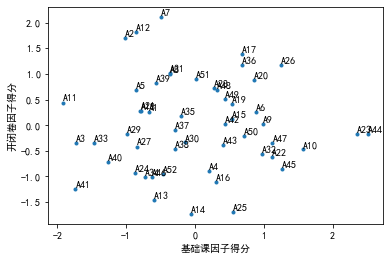

In [2]:
import numpy as np; import pandas as pd
from sklearn import decomposition as dc
from scipy.stats import zscore
import matplotlib.pyplot as plt





c=pd.read_excel("./数据集/Pan11_1_1.xlsx",usecols=np.arange(1,7))
c=c.values.astype(float)
d=zscore(c)          #数据标准化
r=np.corrcoef(d.T)   #求相关系数矩阵
f=pd.ExcelWriter('./数据集/Pan11_1_2.xlsx')
pd.DataFrame(r).to_excel(f); f.save()
val,vec=np.linalg.eig(r)
cs=np.cumsum(val)  #求特征值的累加和
print("特征值为：",val,"\n累加和为：",cs)
fa = dc.FactorAnalysis(n_components = 2)  #构建模型
fa.fit(d)   #求解最大方差的模型
print("载荷矩阵为：\n",fa.components_)
print("特殊方差为：\n",fa.noise_variance_)
dd=fa.fit_transform(d)   #计算因子得分
w=val[:2]/sum(val[:2])  #计算两个因子的权重
df=np.dot(dd,w)        #计算每个评价对象的因子总分
tf=np.sum(c,axis=1)     #计算每个评价对象的实分总分
#构造pandas数据框,第1列到第5列数据分别为因子1得分，因子2得分，因子总分、实分总分和序号
pdf=pd.DataFrame(np.c_[dd,df,tf,np.arange(1,53)],columns=['f1','f2','yf','tf','xh'])
spdf1=pdf.sort_values(by='yf',ascending = False)  #y因子总分从高到低排序
spdf2=pdf.sort_values(by='tf',ascending=False)  #实分总分从高到低排序
print("排序结果为：\n",spdf1,'\n',spdf2)
s=['A'+str(i) for i in range(1,53)]
plt.rc('font',family='SimHei'); plt.rc('axes',unicode_minus=False)
plt.plot(dd[:,0],dd[:,1],'.')
for i in range(len(s)): plt.text(dd[i,0],dd[i,1]+0.03,s[i])
plt.xlabel("基础课因子得分"); plt.ylabel("开闭卷因子得分"); plt.show()

d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


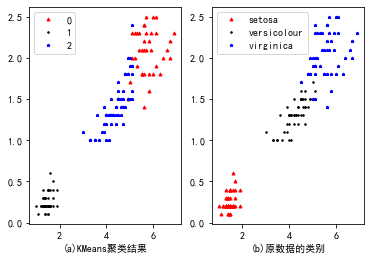

In [7]:
import numpy as np; import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



a=pd.read_csv("./数据集/iris.csv")
b=a.drop(labels="Species",axis=1)
md=KMeans(3); md.fit(b)  #构建模型并求解模型
labels=md.labels_ ;  centers=md.cluster_centers_
b['cluster']=labels  #数据框b添加一个列变量cluster
c=b.cluster.value_counts()  #各类频数统计
plt.rc('font',family='SimHei');
str1=['^r','.k','*b']; plt.subplot(121)
for i in range(len(centers)):
    plt.plot(b['Petal_Length'][labels==i],b['Petal_Width'][labels==i],
                str1[i],markersize=3,label=str(i))
    plt.legend(); plt.xlabel("(a)KMeans聚类结果")
plt.subplot(122); str2=['setosa','versicolour','virginica']
ind=np.c_[np.zeros((1,50)),np.ones((1,50)),2*np.ones((1,50))].flatten()
for i in range(3):
    plt.plot(b['Petal_Length'][ind==i],b['Petal_Width'][ind==i],
                str1[i],markersize=3,label=str2[i])
    plt.legend(); plt.xlabel("(b)原数据的类别")
plt.show()

In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier



x0=np.array([[1.24,1.27], [1.36,1.74], [1.38,1.64], [1.38,1.82], [1.38,1.90], [1.40,1.70],
    [1.48,1.82], [1.54,1.82], [1.56,2.08], [1.14,1.78], [1.18,1.96], [1.20,1.86],
    [1.26,2.00], [1.28,2.00], [1.30,1.96]])   #输入已知样本数据
x=np.array([[1.24,1.80], [1.28,1.84], [1.40,2.04]])  #输入待判样本点数据
g=np.hstack([np.ones(9),2*np.ones(6)])  #g为已知样本数据的类别标号
v=np.cov(x0.T)  #计算协方差
knn=KNeighborsClassifier(2,metric='mahalanobis',metric_params={'V': v}) #马氏距离分类
knn.fit(x0,g); pre=knn.predict(x); print("马氏距离分类结果：",pre)
print("马氏距离已知样本的误判率为：",1-knn.score(x0,g))
knn2=KNeighborsClassifier(2)  #欧氏距离分类
knn2.fit(x0,g); pre2=knn2.predict(x); print("欧氏距离分类结果：",pre2)
print("欧氏距离已知样本的误判率为：",1-knn2.score(x0,g))

马氏距离分类结果： [2. 2. 1.]
马氏距离已知样本的误判率为： 0.0
欧氏距离分类结果： [2. 1. 2.]
欧氏距离已知样本的误判率为： 0.0


In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier



a=pd.read_excel("./数据集/Pdata11_2.xlsx",header=None)
b=a.values
x0=b[:-2,1:-1].astype(float)  #提取已知样本点的观测值
y0=b[:-2,-1].astype(int)
x=b[-2:,1:-1]  #提取待判样本点的观察值
v=np.cov(x0.T)  #计算协方差
knn=KNeighborsClassifier(3,metric='mahalanobis',metric_params={'V': v}) #马氏距离分类
knn.fit(x0,y0); pre=knn.predict(x); print("分类结果：",pre)
print("已知样本的误判率为：",1-knn.score(x0,y0))


分类结果： [1 1]
已知样本的误判率为： 0.15000000000000002


In [3]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



x0=np.array([[1.24,1.27], [1.36,1.74], [1.38,1.64], [1.38,1.82], [1.38,1.90], [1.40,1.70],
    [1.48,1.82], [1.54,1.82], [1.56,2.08], [1.14,1.78], [1.18,1.96], [1.20,1.86],
    [1.26,2.00], [1.28,2.00], [1.30,1.96]])   #输入已知样本数据
x=np.array([[1.24,1.80], [1.28,1.84], [1.40,2.04]])  #输入待判样本点数据
y0=np.hstack([np.ones(9),2*np.ones(6)])  #y0为已知样本数据的类别
clf = LDA()
clf.fit(x0, y0)
print("判别结果为：",clf.predict(x))
print("已知样本的误判率为：",1-clf.score(x0,y0))

判别结果为： [2. 2. 2.]
已知样本的误判率为： 0.0


In [4]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA




a=pd.read_excel("./数据集/Pdata11_2.xlsx",header=None)
b=a.values
x0=b[:-2,1:-1].astype(float)  #提取已知样本点的观测值
y0=b[:-2,-1].astype(int)
x=b[-2:,1:-1]  #提取待判样本点的观察值
clf = LDA()
clf.fit(x0, y0)
print("判别结果为：",clf.predict(x))
print("已知样本的误判率为：",1-clf.score(x0,y0))

判别结果为： [1 2]
已知样本的误判率为： 0.0


In [5]:
import numpy as np
from sklearn.naive_bayes import GaussianNB



x0=np.array([[1.24,1.27], [1.36,1.74], [1.38,1.64], [1.38,1.82], [1.38,1.90], [1.40,1.70],
    [1.48,1.82], [1.54,1.82], [1.56,2.08], [1.14,1.78], [1.18,1.96], [1.20,1.86],
    [1.26,2.00], [1.28,2.00], [1.30,1.96]])   #输入已知样本数据
x=np.array([[1.24,1.80], [1.28,1.84], [1.40,2.04]])  #输入待判样本点数据
y0=np.hstack([np.ones(9),2*np.ones(6)])  #y0为已知样本数据的类别
clf = GaussianNB()
clf.fit(x0, y0)
print("判别结果为：",clf.predict(x))
print("已知样本的误判率为：",1-clf.score(x0,y0))

判别结果为： [2. 2. 1.]
已知样本的误判率为： 0.0


In [6]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import \
LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score




a=pd.read_excel("./数据集/Pdata11_2.xlsx",header=None)
b=a.values
x0=b[:-2,1:-1].astype(float)  #提取已知样本点的观测值
y0=b[:-2,-1].astype(int)
model = LinearDiscriminantAnalysis ()
print(cross_val_score(model, x0, y0,cv=2))

[0.9 0.8]


In [7]:
import numpy as np
from sklearn.decomposition import PCA



a=np.loadtxt("./数据集/Pdata11_7.txt")
b=np.r_[a[:,1:4],a[:,-3:]]  #构造数据矩阵
md=PCA().fit(b)  #构造并训练模型
print("特征值为：",md.explained_variance_)
print("各主成分的贡献率：",md.explained_variance_ratio_)
print("奇异值为：",md.singular_values_)
print("各主成分的系数：\n",md.components_)  #每行是一个主成分
"""下面直接计算特征值和特征向量，和库函数进行对比"""
cf=np.cov(b.T)  #计算协方差阵
c,d=np.linalg.eig(cf) #求特征值和特征向量
print("特征值为：",c)
print("特征向量为：\n",d)
print("各主成分的贡献率为：",c/np.sum(c))

特征值为： [110.00413886  25.32447973   1.56804807]
各主成分的贡献率： [0.80355601 0.18498975 0.01145425]
奇异值为： [31.46485738 15.09703009  3.75665179]
各主成分的系数：
 [[-0.55915657 -0.42128705 -0.71404562]
 [ 0.82767368 -0.33348264 -0.45138188]
 [-0.04796048 -0.84338992  0.53515721]]
特征值为： [110.00413886  25.32447973   1.56804807]
特征向量为：
 [[ 0.55915657  0.82767368 -0.04796048]
 [ 0.42128705 -0.33348264 -0.84338992]
 [ 0.71404562 -0.45138188  0.53515721]]
各主成分的贡献率为： [0.80355601 0.18498975 0.01145425]


In [8]:
import numpy as np
from scipy.stats import zscore




a=np.loadtxt("./数据集/Pdata11_8.txt")
print("相关系数阵为：\n",np.corrcoef(a.T))
b=np.delete(a,0,axis=1) #删除第1列数据
c=zscore(b); r=np.corrcoef(c.T) #数据标准化并计算相关系数阵
d,e=np.linalg.eig(r) #求特征值和特征向量
rate=d/d.sum()  #计算各主成分的贡献率
print("特征值为：",d)
print("特征向量为：\n",e)
print("各主成分的贡献率为：",rate)
k=1; #提出主成分的个数
F=e[:,:k]; score_mat=c.dot(F) #计算主成分得分矩阵
score1=score_mat.dot(rate[0:k])  #计算各评价对象的得分
score2=-score1  #通过观测，调整得分的正负号
print("各评价对象的得分为：",score2) 
index=score1.argsort()+1   #排序后的每个元素在原数组中的位置
print("从高到低各个城市的编号排序为：",index)

相关系数阵为：
 [[1.         0.99995375 0.97540109 0.82305742 0.99139182 0.9375273 ]
 [0.99995375 1.         0.97577629 0.8235592  0.99201302 0.9368829 ]
 [0.97540109 0.97577629 1.         0.82446561 0.97122045 0.91271791]
 [0.82305742 0.8235592  0.82446561 1.         0.85023559 0.80195622]
 [0.99139182 0.99201302 0.97122045 0.85023559 1.         0.92119114]
 [0.9375273  0.9368829  0.91271791 0.80195622 0.92119114 1.        ]]
特征值为： [4.61004272 0.24750271 0.10503409 0.00526533 0.03215514]
特征向量为：
 [[-0.45952752 -0.25173654 -0.1925837   0.75177158  0.35101879]
 [-0.45518408 -0.21034324 -0.37016683 -0.08028926 -0.77787745]
 [-0.41576952  0.90537078  0.03899078  0.07185465 -0.02749689]
 [-0.45997279 -0.13147819 -0.30288681 -0.64336245  0.51525028]
 [-0.44407506 -0.23537559  0.85593653 -0.09651316 -0.07384811]]
各主成分的贡献率为： [0.92200854 0.04950054 0.02100682 0.00105307 0.00643103]
各评价对象的得分为： [ 6.28265085  0.2516401  -1.4888003  -1.53237715 -1.05752141 -0.7568012
  0.99141051 -0.68917209 -0.97584699  

In [10]:
import numpy as np



r=np.array([[1, 1/5, -1/5],[1/5, 1, -2/5],[-1/5, -2/5, 1]])
[val,vec]=np.linalg.eig(r)  #求相关系数阵的特征值和特征向量
A1=np.tile(np.sqrt(val),(3,1))*vec
A2=vec*np.sqrt(val)   #利用广播运算求载荷矩阵
print('val:',val,'\n---------\n',A1,'\n----------\n',A2)
num=int(input("请输入选择公共因子的个数："))
A=A1[:,:num]  #提出num个因子的载荷矩阵
Ac=np.sum(A**2, axis=0)   #逐列元素求和
Ar=np.sum(A**2, axis=1)   #逐行元素求和
print("对x的贡献为：",Ac)
print("共同度为：",Ar)

val: [0.85358984 1.54641016 0.6       ] 
---------
 [[-8.20490756e-01  5.71659793e-01  4.64450253e-17]
 [ 3.00320460e-01  7.80901800e-01  5.47722558e-01]
 [-3.00320460e-01 -7.80901800e-01  5.47722558e-01]] 
----------
 [[-8.20490756e-01  5.71659793e-01  4.64450253e-17]
 [ 3.00320460e-01  7.80901800e-01  5.47722558e-01]
 [-3.00320460e-01 -7.80901800e-01  5.47722558e-01]]
对x的贡献为： [0.85358984 1.54641016 0.6       ]
共同度为： [1. 1. 1.]


In [11]:
import numpy as np
from sklearn.decomposition import FactorAnalysis


r=np.array([[1, 1/5, -1/5],[1/5, 1, -2/5],[-1/5, -2/5, 1]])
fa=FactorAnalysis()
r_fa=fa.fit(r)
print(r_fa.get_params())

{'copy': True, 'iterated_power': 3, 'max_iter': 1000, 'n_components': None, 'noise_variance_init': None, 'random_state': 0, 'rotation': None, 'svd_method': 'randomized', 'tol': 0.01}


[[ 3.          4.          0.16258132  2.        ]
 [ 0.          2.          0.27853564  2.        ]
 [ 1.          8.          0.35618248  3.        ]
 [ 5.          6.          0.37626539  2.        ]
 [ 7.          9.          0.47781458  5.        ]
 [10.         11.          1.01602914  7.        ]]


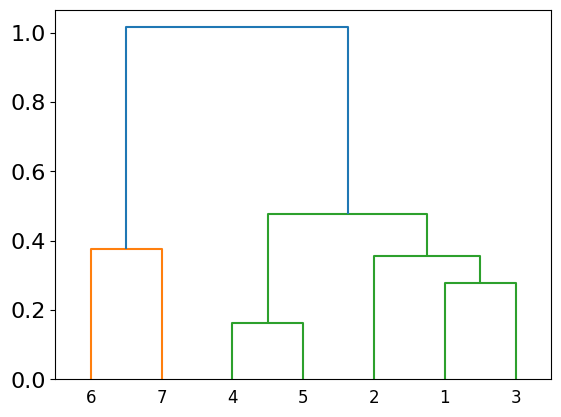

array([[2.9909, 3.2044, 2.8392, 2.5315, 2.5897, 2.96  , 3.1184],
       [0.3111, 0.5348, 0.5696, 0.4528, 0.301 , 3.048 , 2.8395],
       [0.5324, 0.7718, 0.7614, 0.4893, 0.2735, 1.4997, 1.985 ]])

In [1]:
import numpy as np
from sklearn import preprocessing as pp
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt



a=np.loadtxt("./数据集/Pdata11_11.txt")
b=pp.minmax_scale(a.T)   #数据规格化
d = sch.distance.pdist(b)  #求对象之间的两两距离向量
dd = sch.distance.squareform(d)  #转换为矩阵格式
z=sch.linkage(d); print(z) #进行聚类并显示
s=[str(i+1) for i in range(7)]; plt.rc('font',size=16)
sch.dendrogram(z,labels=s); plt.show()  #画聚类图

[[ 3.          4.          0.16258132  2.        ]
 [ 0.          2.          0.27853564  2.        ]
 [ 5.          6.          0.37626539  2.        ]
 [ 1.          8.          0.54290736  3.        ]
 [ 7.         10.          1.01397033  5.        ]
 [ 9.         11.          1.57203348  7.        ]]


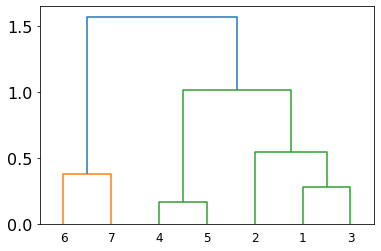

In [14]:
import numpy as np
from sklearn import preprocessing as pp
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt



a=np.loadtxt("./数据集/Pdata11_11.txt")
b=pp.minmax_scale(a.T)   #数据规格化
d = sch.distance.pdist(b)  #求对象之间的两两距离向量
z=sch.linkage(d,'complete'); print(z)  #进行聚类并显示
s=[str(i+1) for i in range(7)]; plt.rc('font',size=16)
sch.dendrogram(z,labels=s); plt.show()  #画聚类图

In [15]:
import numpy as np
from sklearn.cluster import KMeans



a=np.array([[1, 3],[1.5, 3.2],[1.3, 2.8],[3, 1]])
md=KMeans(n_clusters=2)  #构建模型
md.fit(a)   #求解模型
labels=1+md.labels_   #提取聚类标签
centers=md.cluster_centers_   #提取聚类中心,每一行是一个聚类中心
print(labels,'\n-----------\n',centers)

[2 2 2 1] 
-----------
 [[3.         1.        ]
 [1.26666667 3.        ]]


d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


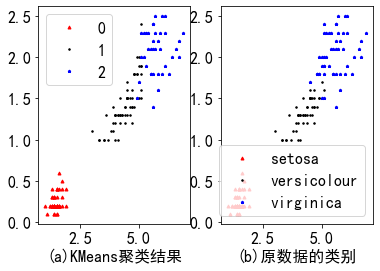

In [16]:
import numpy as np; import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt




a=pd.read_csv("./数据集/iris.csv")
b=a.iloc[:,:-1]
md=KMeans(3); md.fit(b)  #构建模型并求解模型
labels=md.labels_ ;  centers=md.cluster_centers_
b['cluster']=labels  #数据框b添加一个列变量cluster
c=b.cluster.value_counts()  #各类频数统计
plt.rc('font',family='SimHei'); plt.rc('font',size=16)
str1=['^r','.k','*b']; plt.subplot(121)
for i in range(len(centers)):
    plt.plot(b['Petal_Length'][labels==i],b['Petal_Width']
             [labels==i], str1[i],markersize=3,label=str(i))
    plt.legend(); plt.xlabel("(a)KMeans聚类结果")
plt.subplot(122); str2=['setosa','versicolour','virginica']
ind=np.hstack([np.zeros(50),np.ones(50),2*np.ones(50)])
for i in range(3):
    plt.plot(b['Petal_Length'][ind==i],b['Petal_Width'][ind==i],
                str1[i],markersize=3,label=str2[i])
    plt.legend(loc='lower right'); plt.xlabel("(b)原数据的类别")
plt.show()

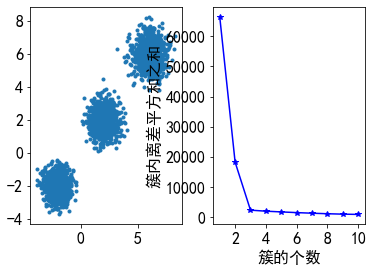

In [2]:
import numpy as np  
import matplotlib.pyplot as plt; from sklearn.cluster import KMeans




mean=np.array([[-2, -2],[2, 2], [6,6]])
cov=np.array([[[0.3, 0], [0, 0.3]],[[0.4, 0], [0, 0.4]],[[0.5, 0], [0, 0.5]]])
x0=[]; y0=[];
for i in range(3):
    x,y=np.random.multivariate_normal(mean[i], cov[i],1000).T
    x0=np.hstack([x0,x]); y0=np.hstack([y0,y])
plt.rc('font',size=16); plt.rc('font',family='SimHei')
plt.rc('axes',unicode_minus=False); plt.subplot(121)
plt.scatter(x0,y0,marker='.')  #画模拟数据散点图
X=np.vstack([x0,y0]).T
np.save("./数据集/Pzdata11_1.npy",X)  #保存数据供下面使用
TSSE=[]; K=10
for k in range(1,K+1):
    SSE = []
    md = KMeans(n_clusters=k); md.fit(X)
    labels = md.labels_; centers = md.cluster_centers_
    for label in set(labels):
        SSE.append(np.sum((X[labels == label,:]-centers[label,:])**2))
    TSSE.append(np.sum(SSE))
plt.subplot(122); plt.style.use('ggplot')
plt.plot(range(1,K+1), TSSE, 'b*-')
plt.xlabel('簇的个数'); plt.ylabel('簇内离差平方和之和'); plt.show()

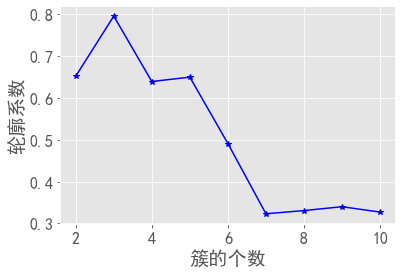

In [3]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.cluster import KMeans; from sklearn import metrics





X=np.load("./数据集/Pzdata11_1.npy")
S=[]; K=10
for k in range(2,K+1):
    md = KMeans(k); md.fit(X)
    labels = md.labels_;
    S.append(metrics.silhouette_score(X,labels,metric='euclidean'))  #计算轮廓系数
plt.rc('font',size=16); plt.rc('font',family='SimHei')
plt.plot(range(2,K+1), S, 'b*-')
plt.xlabel('簇的个数'); plt.ylabel('轮廓系数'); plt.show()

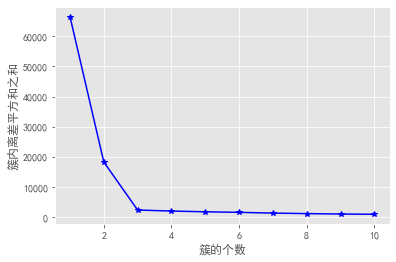

In [4]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.cluster import KMeans; from sklearn import metrics




X=np.load("./数据集/Pzdata11_1.npy")
TSSE=[]; K=10
for k in range(1,K+1):
    SSE = []
    md = KMeans(n_clusters=k); md.fit(X)
    labels = md.labels_; centers = md.cluster_centers_
    for label in set(labels):
        SSE.append(np.sum((X[labels == label,:]-centers[label,:])**2))
    TSSE.append(np.sum(SSE))
plt.rc('font',family='SimHei'); 
plt.style.use('ggplot'); plt.plot(range(1,K+1), TSSE, 'b*-')
plt.xlabel('簇的个数');
plt.ylabel('簇内离差平方和之和'); plt.show()
